# Sentiment Analysis

# Installation

In [1]:
! pip install --user nltk scipy textblob seaborn

In [2]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import re # for regular expression operations
import string  # for string operations
import nltk # for working with natural language processing
import warnings # for handling warnings
import numpy as np # numpy for mathematical calculations
import pandas as pd # pandas for data manipulation 
import seaborn as sns # seaborn for data visualization
import matplotlib.pyplot as plt # matplotlib for data visualization

In [4]:
#set maximum width of column
pd.set_option("display.max_colwidth",200)

#ignore thirdparty depreciation warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

%matplotlib inline

# Importing Traning Dataset
The traning dataset consists of twitter tweet data along with the sentiment they represent.

In [5]:
tweets_data = pd.read_csv("train.csv", encoding="ISO-8859-1")

# Printing Datasets

Displaying data and limit rows to 15 to prevent congestion

## Printing Positive (Non Racist/Sexist) Tweets

Positive tweets are the tweets with a positive sentiment i.e, non racist and sexist comments. 

In [6]:
tweets_data[tweets_data["sentiment"] == 0].head(15) 

,id,sentiment,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢ÂÂ¦
7,8,0,the next school year is the year for exams.Ã°ÂÂÂ¯ can't think about that Ã°ÂÂÂ­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢ÂÂ¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


## Printing Negative (Racist/Sexist) Tweets

Positive tweets are the tweets with a negative sentiment i.e, racist and/or sexist comments. This tweets depicts cyberbullying tendencies.

In [7]:
tweets_data[tweets_data["sentiment"] == 1].head(15)

,id,sentiment,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,Ã°ÂÂÂ©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medÃ¢ÂÂ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsÃ¢ÂÂ¦


# Data Count

## Positive (Non Racist/Sexist) Tweets

In [8]:
(tweets_data['sentiment'].value_counts()[0])

29720

## Neagtive (Racist/Sexist) Tweets

In [9]:
(tweets_data['sentiment'].value_counts()[1])

2242

## Graph Represnting Data Count

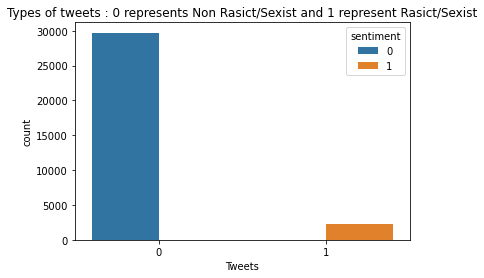

In [10]:
sns.countplot(data=tweets_data, x='sentiment', hue='sentiment')
plt.title('Types of tweets : 0 represents Non Rasict/Sexist and 1 represent Rasict/Sexist')
plt.xlabel('Tweets')
plt.show()

### Dataframe Info

In [11]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31962 non-null  int64 
 1   sentiment  31962 non-null  int64 
 2   tweet      31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocess Tweets

## Emoticon Handler Function

In [12]:
def emoticon_handler(text):
    '''Takes a text and retuns a emoticon filtered text'''
    # Smile or Happy Face Emoji --> :), : ), :-), (:, ( :, (-:, :') , :O, :-] represent positive emotion
    emoticon_free_text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O|:-])', ' positiveemoticon ', text) # replace occurrences of a particular emoticon with another stirng.
    # Laugh or Grin Emoji --> :D, : D, :-D, xD, x-D, XD, X-D text positive emotion
    emoticon_free_text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoticon ', emoticon_free_text)
    # Love Emoji --> <3, :* represent positive emotion
    emoticon_free_text = re.sub(r'(<3|:\*)', ' positiveemoticon ', emoticon_free_text)
    # Wink Emoji --> ;-), ;), ;-D, ;D, (;,  (-; , @-) represent positive emotion
    emoticon_free_text = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoticon ', emoticon_free_text)
    # Sad Emoji -- :-(, : (, :(, ):, )-:, :-/ , :-| represent negative emotion
    emoticon_free_text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negativeemoticon ', emoticon_free_text)
    # Cry Emoji -- :,(, :'(, :"( represent negative emotion
    emoticon_free_text = re.sub(r'(:,\(|:\'\(|:"\()', ' negativeemoticon ', emoticon_free_text)
    return emoticon_free_text

## Abbreviations Handler Function

In [13]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

def convert_abbrev_to_word(tweet):
    '''takes a tweet and replaces the abbreviations with their full form'''
    non_abb_tweet=[]
    words=tweet.split()
    non_abb_tweet = [abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word for word in words]
    return ' '.join(non_abb_tweet)  


## Tweet Cleanser Function

In [14]:
def cleanse_tweet(tweet):
    '''
    Input: 
        tweet: tweet text with unwanted text and characters
    Output: 
        tweet: cleansed tweet text
    '''
    tweet = tweet.lower()                                             # Lowercase the string
    tweet = re.sub('&quot;'," ", tweet)                               # Remove Quotation Marks
    tweet = re.sub('&amp;'," ", tweet)                                # Remove Ampersand Marks
    tweet = re.sub('@[^\s]+','',tweet)                                # Remove twitter handle
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Remove all punctuations and hashtags symbol
    tweet = convert_abbrev_to_word(tweet)                             # handle abbreviation
    tweet = re.sub('&[^\s]+','',tweet)                                # Remove and sign
    tweet = re.sub('â[^\s]+','',tweet)                                # Remove ascents
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", tweet)               # Remove digits
    tweet = emoticon_handler(tweet)                                   # Replace Emoticons
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Limit successive occurance to same letter to two
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Limit spaces to single spaces
    tweet = ' '.join([word for word in tweet.split() if len(word)>2]) # Removing Single and double lettered words

    return tweet

## Tokenization Function

In [15]:
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [16]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
def tokenize_tweet(tweet):
    '''takes normal tweet and returns tokenized tweets'''
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens

## Function to Removing Stop Words

In [17]:
from nltk.corpus import stopwords

In [18]:
#Import list of english stopwords from NLTK
stopwords_english = stopwords.words('english')

def remove_stopword(tweet_tokens):
    '''takes tweet tokens and return stop word free tweets'''
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english):
            tweets_clean.append(word)        
    return tweets_clean

## Stemming Function

In [19]:
from nltk.stem.porter import *

In [20]:
stemmer = PorterStemmer()
def tweet_stemmer(word):
    '''takes tweet word and return stemmed word'''
    return stemmer.stem(word)

### Making a new column for processed tweet

In [21]:
tweets_data['processed_tweet'] = np.vectorize(cleanse_tweet)(tweets_data["tweet"]) #modifies list elements for each in the list

In [22]:
tweets_data[tweets_data['sentiment'] == 0].head(10)

,id,sentiment,tweet,processed_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional and selfish drags his kids into his dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for lyft credit can use cause they don offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦,model love you take with you all the time urã
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢ÂÂ¦,camping tomorrow dannyã
7,8,0,the next school year is the year for exams.Ã°ÂÂÂ¯ can't think about that Ã°ÂÂÂ­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year the year for exams can think about that school exams hate imagine actorslife revolutionschool girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢ÂÂ¦,won love the land allin cavs champions cleveland clevelandcavaliers
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here great


## Tokenization of Tweets

In [23]:
processed_tweets = tweets_data['processed_tweet'].apply(lambda x: tokenize_tweet(x)) # tokenize tweet using tokenize function
processed_tweets.head()

0                        [when, father, dysfunctional, and, selfish, drags, his, kids, into, his, dysfunction, run]
1    [thanks, for, lyft, credit, can, use, cause, they, don, offer, wheelchair, vans, pdx, disapointed, getthanked]
2                                                                                           [bihday, your, majesty]
3                                                          [model, love, you, take, with, you, all, the, time, urã]
4                                                                            [factsguide, society, now, motivation]
Name: processed_tweet, dtype: object

## Removal of Stop Words From Tweet

In [24]:
processed_tweets = processed_tweets.apply(lambda x: remove_stopword(x)) #removing english stopwords
processed_tweets.head(10)

0                                               [father, dysfunctional, selfish, drags, kids, dysfunction, run]
1                     [thanks, lyft, credit, use, cause, offer, wheelchair, vans, pdx, disapointed, getthanked]
2                                                                                             [bihday, majesty]
3                                                                                [model, love, take, time, urã]
4                                                                             [factsguide, society, motivation]
5                             [huge, fan, fare, big, talking, leave, chaos, pay, disputes, get, allshowandnogo]
6                                                                                   [camping, tomorrow, dannyã]
7    [next, school, year, year, exams, think, school, exams, hate, imagine, actorslife, revolutionschool, girl]
8                                           [love, land, allin, cavs, champions, cleveland, clevelandcav

## Stemming of Tweets

In [25]:
processed_tweets = processed_tweets.apply(lambda x: [tweet_stemmer(i) for i in x]) #it will stemmatized all words in tweet
processed_tweets.head(10)

0                                                     [father, dysfunct, selfish, drag, kid, dysfunct, run]
1                        [thank, lyft, credit, use, caus, offer, wheelchair, van, pdx, disapoint, getthank]
2                                                                                         [bihday, majesti]
3                                                                            [model, love, take, time, urã]
4                                                                               [factsguid, societi, motiv]
5                                [huge, fan, fare, big, talk, leav, chao, pay, disput, get, allshowandnogo]
6                                                                                  [camp, tomorrow, dannyã]
7    [next, school, year, year, exam, think, school, exam, hate, imagin, actorslif, revolutionschool, girl]
8                                            [love, land, allin, cav, champion, cleveland, clevelandcavali]
9                           

## Concatination of Preprocessed Tweets

In [26]:

for i in range(len(processed_tweets)):
    processed_tweets[i] = ' '.join(processed_tweets[i]) #concat all words into one sentence
tweets_data['processed_tweet'] = processed_tweets
for i in tweets_data['processed_tweet'].head(10):
    print (i)

father dysfunct selfish drag kid dysfunct run
thank lyft credit use caus offer wheelchair van pdx disapoint getthank
bihday majesti
model love take time urã
factsguid societi motiv
huge fan fare big talk leav chao pay disput get allshowandnogo
camp tomorrow dannyã
next school year year exam think school exam hate imagin actorslif revolutionschool girl
love land allin cav champion cleveland clevelandcavali
welcom great


# Comparing Preprocessed Tweets to Old tweets

In [27]:
tweets_data[tweets_data['sentiment'] == 0].head(10)

,id,sentiment,tweet,processed_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use caus offer wheelchair van pdx disapoint getthank
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦,model love take time urã
4,5,0,factsguide: society now #motivation,factsguid societi motiv
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare big talk leav chao pay disput get allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢ÂÂ¦,camp tomorrow dannyã
7,8,0,the next school year is the year for exams.Ã°ÂÂÂ¯ can't think about that Ã°ÂÂÂ­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exam think school exam hate imagin actorslif revolutionschool girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢ÂÂ¦,love land allin cav champion cleveland clevelandcavali
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcom great


# Categorization of Tweets 

In [28]:
from textblob import TextBlob

In [29]:
positive_tweets=[] #List of non racist and sexist tweets
negative_tweets=[] #list of racist and sexist tweets
neutral_tweets=[] #list of neutral tweets


for tweet in tweets_data['processed_tweet']:
    
    tweet_analysis = TextBlob(tweet).sentiment #return polarity and subjectivity of a sentence. 
                                                
    tweet_polarity = tweet_analysis.polarity # get polarity of tweet from the analysis 
    
    #polarity lies bewteen  -1 to 1, -1 polarity means that the tweet depicts a negative sentiment
    #1 polarity means that the tweet depicts a negative sentiment
    #0 depicts a neutral sentiment
    
    if tweet_polarity > 0: 
        positive_tweets.append(tweet)
        
    elif tweet_polarity < 0: 
        negative_tweets.append(tweet)
       
    else: 
        neutral_tweets.append(tweet)

In [30]:
print("Total positive tweets: " + str(len(positive_tweets)))
positive_tweets_df = pd.DataFrame(positive_tweets, columns=["Positive Tweets (Processed)"])
positive_tweets_df

Total positive tweets: 11784


,Positive Tweets (Processed)
0,model love take time urã
1,huge fan fare big talk leav chao pay disput get allshowandnogo
2,love land allin cav champion cleveland clevelandcavali
3,welcom great
4,friday smile around via user cooki make peopl
...,...
11779,post new blog secondlif lone neko
11780,went far
11781,good morn instagram shower water berlin berlincitygirl girl newyork genf bern
11782,holiday bull domin bull direct whatev want


In [31]:
print("Total Negative tweets: " + str(len(negative_tweets)))
negative_tweets_df = pd.DataFrame(negative_tweets, columns=["Negative Tweets (Processed)"])
negative_tweets_df

Total Negative tweets: 3904


,Negative Tweets (Processed)
0,father dysfunct selfish drag kid dysfunct run
1,next school year year exam think school exam hate imagin actorslif revolutionschool girl
2,selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love
3,sad littl dude badday coneofsham cat piss funni laugh
4,hard monday due cloudi weather disabl oxygen product today goodnight badmonday
...,...
3899,hea easiest thing fool sad take thought anywher way
3900,want know live life thing make happi less thing make unhappi simpl
3901,surround peopl love even deserv yet hate
3902,less week ibiza bringiton mallorca holiday summer


In [32]:
print("Total Neutral tweets: " + str(len(neutral_tweets)))
neutral_tweets_df = pd.DataFrame(neutral_tweets, columns=["Neutral Tweets (Processed)"])
neutral_tweets_df

Total Neutral tweets: 16274


,Neutral Tweets (Processed)
0,thank lyft credit use caus offer wheelchair van pdx disapoint getthank
1,bihday majesti
2,factsguid societi motiv
3,camp tomorrow dannyã
4,ireland consum price index mom climb previou may blog silver gold forex
...,...
16269,make ask anybodi god thank god
16270,ate isz youu
16271,see nina turner airwav tri wrap mantl genuin hero like shirley chisolm shame imwithh
16272,sikh templ vandalis calgari wso condemn act


# Data Visualization 

In [33]:
from wordcloud import WordCloud

## Displaying Positive Tweets Words in a WordCloud

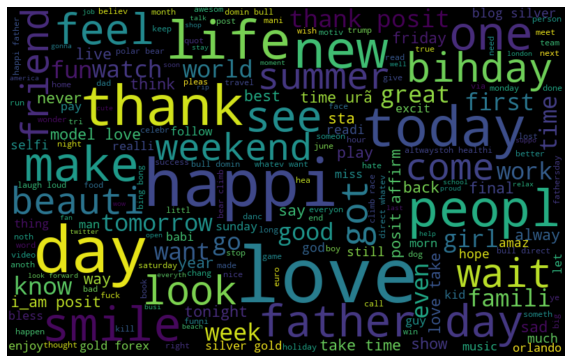

In [34]:
positive_words= ' '.join([text for text in tweets_data['processed_tweet'][tweets_data['sentiment']== 0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Displaying Negative Tweets Words in a WordCloud

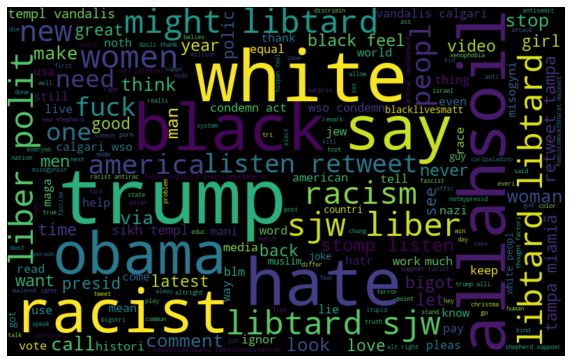

In [35]:
negative_words= ' '.join([text for text in tweets_data['processed_tweet'][tweets_data['sentiment']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
## Representing Positive, Negative and Neutral Tweets in a Pie Chart 

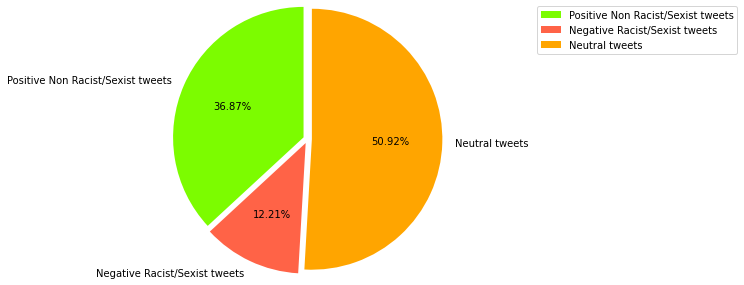

In [37]:
sentiments = ['Positive Non Racist/Sexist tweets','Negative Racist/Sexist tweets', 'Neutral tweets'] 
slices = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
colors = ['lawngreen', 'tomato','orange'] 
x = [0.05,0.05,0.05]
pie  = plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = False, explode=x, radius = 1.5, autopct = '%1.2f%%')
plt.legend(labels= sentiments, bbox_to_anchor=(2.5,1), loc="center right")

plt.show()

# Naive Bayes Classifier

## Spilt Data into Train/Test

In [38]:
all_positive_tweets = [text for text in tweets_data['processed_tweet'][tweets_data['sentiment']== 0]] # get list of positive tweets
all_negative_tweets = [text for text in tweets_data['processed_tweet'][tweets_data['sentiment']== 1]] # get list of negative tweets

train_pos = all_positive_tweets[:2000] # set positive train data as first 2000 positive tweets

train_neg = all_negative_tweets[:2000] # set negative train data as first 2000 negative tweets

test_pos = all_positive_tweets[-500:] # set positive test data as last 500 positive tweets

test_neg = all_negative_tweets[-500:] # set negative test data as last 500 negative tweets

train_x = train_pos + train_neg #set train_x as concatenate list of train positive and negative data

test_x = test_pos +  test_neg #set test_x as concatenate list of test positive and negative data

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg))) # set train_y as list of corresponding sentiment of train data

test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))  # set test_y as list of corresponding sentiment of test data


## Function to Frequency Dictionary

In [39]:
def create_frequency(tweets, sentiments):
    '''takes tweets data and their sentiment data and returns a frequency dictionary'''
    freq_d = {}
    
    for (tweet, sentiment) in zip(tweets,sentiments):
        for word in (tweet.split()):
            pair = (word, sentiment)
            if pair in freq_d:
                freq_d[pair] = freq_d[pair]+1
            else:
                freq_d[pair] = 1
    
    return freq_d

# Train Model Using Naive Bayes

### Creating Frequency Dictionary of Train Data

In [40]:
freq_dict = create_frequency(train_x, train_y)

In [41]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: frequency dictionary from (word, label) to show the occurance of words
        train_x: list of tweets
        train_y: a list of sentiment correponding to the tweets 0 represents positive and 1 represents negative
    Output:
        logprior: the log prior
        loglikelihood: the log likelihood of the occurance of words in a positive or negative sentence
    '''
    
    loglikelihood = {}
    logprior = 0
    
    # determine the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    vocab_len = len(unique_words)
    
    # calculate positive_tweet_count and negative_tweet_count
    positive_word_count = negative_word_count = 0
    for pair in freqs.keys():
        # Getting positive_word_count and negative_word_count
       
        if(pair[1]>0):
            positive_word_count = positive_word_count + freqs[(pair)]
        else:
            negative_word_count = negative_word_count + freqs[(pair)]
            
    # calculate the number of tweets
    total_tweets_count = train_y.shape[0]
    
    # calculate the number of positive tweets
    positive_tweet_count = sum(train_y)
    
    # calculate the number of negative tweets
    negative_tweet_count = total_tweets_count - positive_tweet_count
    
    # calculate logprior
    logprior = np.log(positive_tweet_count/negative_tweet_count)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1),0) #returns 0 if word not found
        freq_neg = freqs.get((word,0),0) #returns 0 if word not found
        
        # calculate the probability given that the word is positive
        p_w_pos = (freq_pos+1)/(positive_word_count + vocab_len)
        
        # calculate the probability given that the word is negative  
        p_w_neg = (freq_neg+1)/(negative_word_count + vocab_len)
        
        # determine the log likelihood of the word and add to loglikelihood dictionary
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
        
    return logprior, loglikelihood

In [42]:
logprior, loglikelihood = train_naive_bayes(freq_dict, train_x, train_y)
print("Log Prior: " + str(logprior))
print("Word Log Likelihoods: ")
print((loglikelihood))

Log Prior: 0.0
Word Log Likelihoods: 
{'environment': -1.0725279034136244, 'schwandorfchwandorf': 0.7192315658144308, 'humor': 0.0260843852544855, 'whenyourenotrightinyourhea': 0.7192315658144308, '2017in3word': -1.0725279034136244, 'whenrealtorscompeteyouwin': 0.7192315658144308, 'havefun': 0.7192315658144308, 'votersuppress': -0.6670627953054599, 'withmom': 0.7192315658144308, 'socialclass': -0.6670627953054599, 'planet': 0.0260843852544855, 'hint': 1.1246966739225952, 'faraz': 0.7192315658144308, 'drink': 1.412378746374376, 'purpos': -0.8902063466196697, 'sho': 0.7192315658144308, 'mediocr': -0.6670627953054599, 'sea': -1.8197423052438455, 'sir': -1.0725279034136244, 'henri': 0.7192315658144308, 'fruit': 1.6355222976885857, 'hag': -0.6670627953054599, 'streetautopia': 0.7192315658144308, 'commonã': -0.6670627953054599, 'codifi': -0.6670627953054599, 'disrespect': -0.8902063466196697, 'jenner': 0.7192315658144308, 'messag': -1.2731985988757755, 'quietli': -0.6670627953054599, 'stud':

## Prediction

In [43]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: tweet string
        logprior: logprior number
        loglikelihood: dictionary of words mapping to the occurance of words
    Output:
        prob: sum of logliklihoods of each word in the tweet (if it exists in the dictionary) and the logprior

    '''

    # split the process tweet to get a list of word
    word_list = tweet.split()
    # initialize probability to zero
    prob = 0

    # add the logprior to the initial probabilty
    prob += logprior

    for word in word_list:
        # get log likelihood of each keyword from likelihood dictionary
        if(word in loglikelihood):
             prob += loglikelihood[word]

    return prob

# Testing Model

In [44]:
result = []  # result list consists of results 
sentiment = []
pred_tweets = []
pred_loglikelihood = []
racist_or_sexist = []
cyberbullying = []

for tweet in test_x:  
    if(naive_bayes_predict(tweet, logprior, loglikelihood)>0):
        result.append(1)
        sentiment.append("positive")
        racist_or_sexist.append(False)
        cyberbullying.append(False) 
    else:
        result.append(0)
        sentiment.append("negative")
        racist_or_sexist.append(True)
        cyberbullying.append(True) 
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    pred_tweets.append(tweet);
    pred_loglikelihood.append("{:.2f}".format(p));
    print(f'{tweet} -> {p:.2f}')
    

thrill join amaz vendor the_vintage_market fall -> 4.72
year old japanes student wore school idea neither teacher fridayfeel -> -0.29
semi final bend ore owen wild win get ship father day -> 6.04
poland retail sale yoy dip previou may blog silver gold forex -> 15.78
take leisur walk picturesqu minneapoli travel -> 2.33
factsguid world social media motiv -> 1.45
scare nervou girlpowerwin firstã -> 1.95
father day -> 4.78
thank fuck gameofthron -> 0.36
chang regestr team base like concept come form team hopetojoiny -> -3.91
good even smile love duti even like 4like follow 4follow eve eveningã -> 6.35
personalis gbp get shop cool home fun -> 10.31
new cut tomorrow -> 1.87
legaci rich honesti william shakespear leadership inspir quot inspir -> 3.16
robin success life wisdom love -> 8.08
convinc one round thought prayer congression leader fix problem time -> 0.61
alway listen reliev stress refresh time -> 0.53
peopl play state dey play india futur -> 2.91
steven make dramat entranc -> 0.53


In [45]:
data = {"Processed Tweet": pred_tweets, "Sentiment": sentiment, "Racist/Sexist" : racist_or_sexist, "Shows Cyberbullying Tendency": cyberbullying}
result_df = pd.DataFrame(data)
(result_df)

,Processed Tweet,Sentiment,Racist/Sexist,Shows Cyberbullying Tendency
0,thrill join amaz vendor the_vintage_market fall,positive,False,False
1,year old japanes student wore school idea neither teacher fridayfeel,negative,True,True
2,semi final bend ore owen wild win get ship father day,positive,False,False
3,poland retail sale yoy dip previou may blog silver gold forex,positive,False,False
4,take leisur walk picturesqu minneapoli travel,positive,False,False
...,...,...,...,...
995,ladi ban kentucki mall jcpenni kentucki,negative,True,True
996,omfg offend mailbox proud mailboxprid liberalism,positive,False,False
997,ball hashtag say weasel away lumpi toni dipshit,negative,True,True
998,make ask anybodi god thank god,positive,False,False


# Confusion Matrix

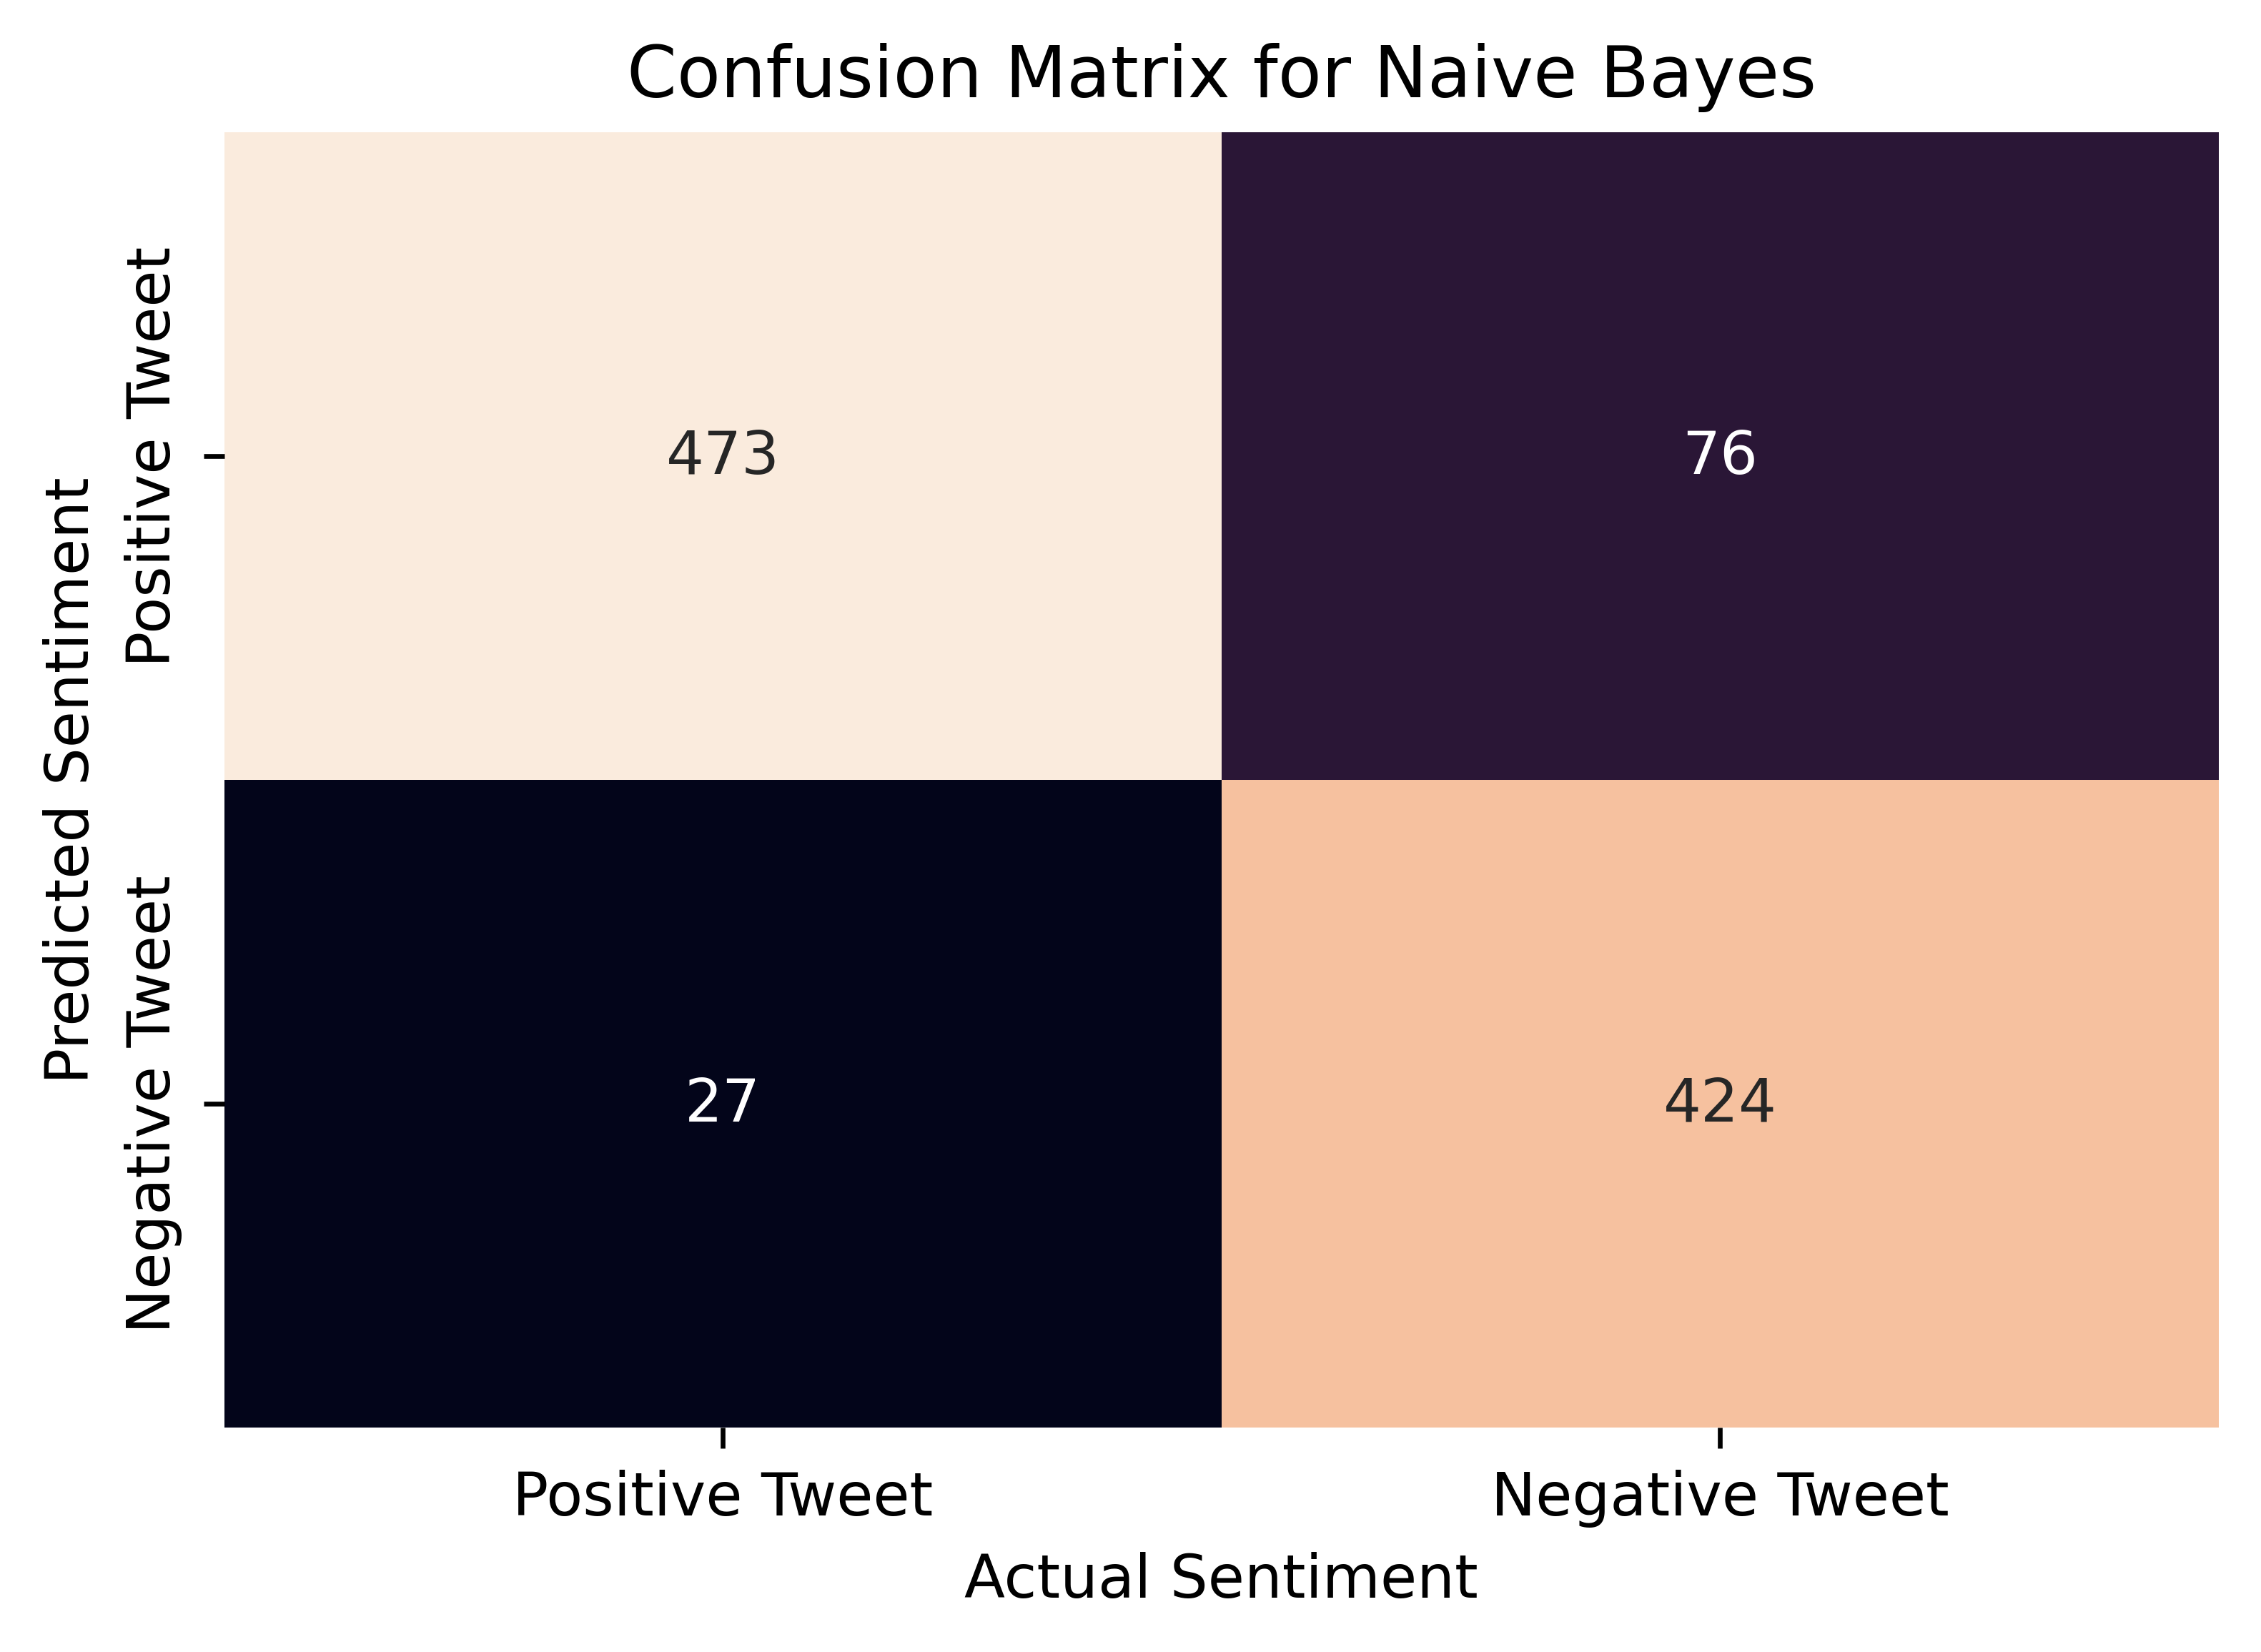

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=600)
mat = confusion_matrix(test_y, result)#measure the performance of a classification algorithm
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)#using seaborn

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.savefig("confusion_matrix.png")
ax= plt.subplot()
ax.xaxis.set_ticklabels(['Positive Tweet', 'Negative Tweet']);
ax.yaxis.set_ticklabels(['Positive Tweet', 'Negative Tweet']);
    
plt.show()

# Testing Accuracy of the Model

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
score_naive = accuracy_score(result, test_y)
print("Accuracy Score with Naive-bayes: ",score_naive, "i.e, " + str(score_naive*100) + "%")

Accuracy Score with Naive-bayes:  0.897 i.e, 89.7%
